# Word Analysis

## Introduction

Standard data analysis techniques include finding the average, the distribution, the most common values/frequency, etc. For now, I'll look at the common words in the dataset so we can then look at the sentiment value of those words. 

1. **Common words** - 

## Common Word Analysis

In [40]:
# Read in the document-term matrix
import pandas as pd

data = pd.read_pickle('dtm.pkl')
data = data.transpose()
data.head()

,0,1,2,3,4,5,6,7,8,9,...,341,342,343,344,345,346,347,348,349,350
ability,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
able,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
absence,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
absent,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
abstain,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0


In [41]:
# Find the top 3 words used by players
top_dict = {}
for c in data.columns:
    top = data[c].sort_values(ascending=False).head(3)
    top_dict[c]= list(zip(top.index, top.values))

top_dict

{0: [('affect', 1), ('arts', 1), ('highest', 1)],
 1: [('day', 1), ('man', 1), ('long', 1)],
 2: [('want', 1), ('thing', 1), ('zeal', 0)],
 3: [('secrecy', 1), ('fusing', 1), ('backbone', 1)],
 4: [('day', 1), ('yesterday', 1), ('scholar', 1)],
 5: [('man', 1), ('destiny', 1), ('matter', 1)],
 6: [('man', 1), ('wants', 1), ('consider', 1)],
 7: [('true', 1), ('going', 1), ('friend', 1)],
 8: [('master', 1), ('arithmetic', 1), ('count', 1)],
 9: [('failures', 1), ('did', 1), ('success', 1)],
 10: [('adventures', 1), ('life', 1), ('fertilize', 1)],
 11: [('little', 1), ('nonknowledge', 1), ('island', 1)],
 12: [('day', 2), ('fathers', 1), ('forward', 0)],
 13: [('dad', 1), ('model', 1), ('son', 1)],
 14: [('wise', 1), ('knows', 1), ('child', 1)],
 15: [('way', 1), ('wisdom', 1), ('happiness', 1)],
 16: [('animosity', 1), ('spent', 1), ('registering', 1)],
 17: [('words', 1), ('pictures', 1), ('thoughts', 1)],
 18: [('search', 1), ('man', 1), ('meaning', 1)],
 19: [('stronger', 1), ('make

In [84]:
# Print the top 1 most frequent words said in each entry
for player, top_words in top_dict.items():
    print(player)
    print(', '.join([word for word, count in top_words[0:1]]))
    print('---')

0
affect
---
1
day
---
2
want
---
3
secrecy
---
4
day
---
5
man
---
6
man
---
7
true
---
8
master
---
9
failures
---
10
adventures
---
11
little
---
12
day
---
13
dad
---
14
wise
---
15
way
---
16
animosity
---
17
words
---
18
search
---
19
stronger
---
20
doing
---
21
elegant
---
22
digesting
---
23
better
---
24
invention
---
25
fun
---
26
strike
---
27
history
---
28
wishes
---
29
freedom
---
30
return
---
31
history
---
32
help
---
33
youve
---
34
ability
---
35
adventure
---
36
does
---
37
pen
---
38
really
---
39
future
---
40
higher
---
41
greatness
---
42
wisdom
---
43
fact
---
44
nice
---
45
truth
---
46
attractive
---
47
different
---
48
precept
---
49
win
---
50
sand
---
51
principle
---
52
wake
---
53
imagination
---
54
wealth
---
55
happen
---
56
year
---
57
accept
---
58
dancing
---
59
permitted
---
60
lack
---
61
way
---
62
chance
---
63
disguised
---
64
party
---
65
wisdom
---
66
assets
---
67
disagreement
---
68
advise
---
69
talk
---
70
lest
---
71
greatest
---
72
abs

**NOTE:** Some top wordshave very little meaning and could be added to a stop words list.



In [85]:
# Look at the most common top words --> add them to the stop word list
from collections import Counter

# Let's first pull out the top 3 words for each player
words = []
for player in data.columns:
    top = [word for (word, count) in top_dict[player]]
    for t in top:
        words.append(t)
        
words

['affect',
 'arts',
 'highest',
 'day',
 'man',
 'long',
 'want',
 'thing',
 'zeal',
 'secrecy',
 'fusing',
 'backbone',
 'day',
 'yesterday',
 'scholar',
 'man',
 'destiny',
 'matter',
 'man',
 'wants',
 'consider',
 'true',
 'going',
 'friend',
 'master',
 'arithmetic',
 'count',
 'failures',
 'did',
 'success',
 'adventures',
 'life',
 'fertilize',
 'little',
 'nonknowledge',
 'island',
 'day',
 'fathers',
 'forward',
 'dad',
 'model',
 'son',
 'wise',
 'knows',
 'child',
 'way',
 'wisdom',
 'happiness',
 'animosity',
 'spent',
 'registering',
 'words',
 'pictures',
 'thoughts',
 'search',
 'man',
 'meaning',
 'stronger',
 'makes',
 'does',
 'doing',
 'youd',
 'work',
 'elegant',
 'aint',
 'genius',
 'digesting',
 'eating',
 'read',
 'better',
 'said',
 'zeal',
 'invention',
 'father',
 'doubt',
 'fun',
 'work',
 'zeal',
 'strike',
 'talent',
 'lives',
 'history',
 'makers',
 'fortune',
 'wishes',
 'live',
 'freedom',
 'freedom',
 'means',
 'opportunity',
 'return',
 'evident',
 're

In [86]:
# Let's aggregate this list and identify the most common words along with how many tweets they occur in
word_count = Counter(words).most_common()
word_count = pd.DataFrame(common_words)
word_count.to_csv('word_count.csv')
word_count

,0,1
0,zeal,43
1,life,16
2,man,13
3,fortune,11
4,think,10
...,...,...
624,schoolmasters,1
625,humility,1
626,wanting,1
627,instinct,1


In [87]:
# If more than half of the comedians have it as a top word, exclude it from the list
add_stop_words = [word for word, count in Counter(words).most_common() if count < 2]
add_stop_words

['affect',
 'arts',
 'fathers',
 'dad',
 'model',
 'son',
 'wise',
 'child',
 'elegant',
 'aint',
 'digesting',
 'eating',
 'said',
 'strike',
 'wishes',
 'trapped',
 'helps',
 'youve',
 'use',
 'succeeded',
 'comes',
 'higher',
 'responsible',
 'patience',
 'companion',
 'fact',
 'evidence',
 'space',
 'attractive',
 'laziness',
 'different',
 'hell',
 'heaven',
 'precept',
 'lived',
 'win',
 'sand',
 'hourglass',
 'escaped',
 'wake',
 'product',
 'accept',
 'methods',
 'dancing',
 'permitted',
 'choose',
 'lack',
 'starve',
 'selfrealization',
 'pants',
 'nights',
 'disguised',
 'hatred',
 'property',
 'lingers',
 'assets',
 'profit',
 'disagreement',
 'countries',
 'advise',
 'compel',
 'seriously',
 'lest',
 'ye',
 'darkness',
 'greatest',
 'remedy',
 'absent',
 'avarice',
 'masked',
 'stilts',
 'obedience',
 'desire',
 'awake',
 'asleep',
 'kills',
 'vivifies',
 'solitude',
 'problem',
 'distance',
 'deal',
 'need',
 'deep',
 'appearance',
 'revealing',
 'aim',
 'education',
 'cul

In [88]:
# Let's update our document-term matrix with the new list of stop words
from sklearn.feature_extraction import text 
from sklearn.feature_extraction.text import CountVectorizer

# Read in cleaned data
data_clean = pd.read_pickle('data_clean.pkl')

# Add new stop words
stop_words = text.ENGLISH_STOP_WORDS.union(add_stop_words)

# Recreate document-term matrix
cv = CountVectorizer(stop_words=stop_words)
data_cv = cv.fit_transform(data_clean.tweet)
data_stop = pd.DataFrame(data_cv.toarray(), columns=cv.get_feature_names())
data_stop.index = data_clean.index

# Pickle it for later use
import pickle
pickle.dump(cv, open("cv_stop.pkl", "wb"))
data_stop.to_pickle("dtm_stop.pkl")

In [89]:
#!pip install wordcloud
# Let's make some word clouds!
# Terminal / Anaconda Prompt: conda install -c conda-forge wordcloud
from wordcloud import WordCloud

wc = WordCloud(stopwords=stop_words, background_color="white", colormap="Dark2",
               max_font_size=150, random_state=42)

ValueError: num must be 1 <= num <= 15, not 16

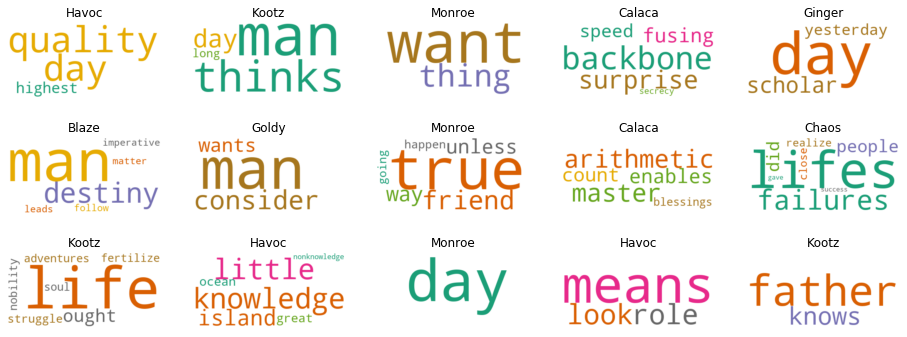

In [90]:
# Reset the output dimensions
import matplotlib.pyplot as plt

plt.rcParams['figure.figsize'] = [16, 6]
# Read in cleaned data
#data_clean = pd.read_pickle('data_clean.pkl')
full_names = data_clean["player"]

# Create subplots for each comedian
for index, player in enumerate(data.columns):
    wc.generate(data_clean.tweet[player])
    
    plt.subplot(3, 5, player+1)
    plt.imshow(wc, interpolation="bilinear")
    plt.axis("off")
    plt.title(full_names[index])
    
plt.show()

## Diversity of Words

In [91]:
# Find the number of unique words that each comedian uses

# Identify the non-zero items in the document-term matrix, meaning that the word occurs at least once
unique_list = []
for player in data.columns:
    uniques = data[player].to_numpy().nonzero()[0].size
    unique_list.append(uniques)

# Create a new dataframe that contains this unique word count
data_words = pd.DataFrame(list(zip(full_names, unique_list)), columns=['player', 'unique_words'])
data_unique_sort = data_words.sort_values(by='unique_words')
data_unique_sort

,player,unique_words
100,Riot,1
101,Goldy,1
143,Guapo,1
226,Chaos,1
104,Kootz,1
...,...,...
43,Chaos,9
87,Ginger,9
221,Goldy,9
33,Blaze,10
